<a href="https://colab.research.google.com/github/Phupoonyawee/AllProject/blob/main/Sample_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Import and preview data first 5 rows
store = pd.read_csv('/var/SampleStore.csv')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,08/11/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0%,41.9136
1,2,CA-2019-152156,08/11/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0%,219.5820
2,3,CA-2019-138688,12/06/2019,16/06/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0%,6.8714
3,4,US-2018-108966,11/10/2018,18/10/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45%,-383.0310
4,5,US-2018-108966,11/10/2018,18/10/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20%,2.5164


In [10]:
# preview data last 5 rows
store.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2017-110422,21/01/2017,23/01/2017,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,20%,4.1028
9990,9991,CA-2020-121258,26/02/2020,03/03/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0%,15.6332
9991,9992,CA-2020-121258,26/02/2020,03/03/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,20%,19.3932
9992,9993,CA-2020-121258,26/02/2020,03/03/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0%,13.3200
9993,9994,CA-2020-119914,04/05/2020,05/09/2020,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0%,72.9480


In [11]:
# Shape of Dataframe
store.shape

(9994, 21)

In [12]:
store['Order Date'] = pd.to_datetime(store['Order Date'], format='%d/%m/%Y')

In [13]:
# Information of dataframe
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   object        
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [14]:
# Count nan in postal code column
store['Postal Code'].isna().sum()

11

In [15]:
# Filter rows with missing values
store_missing = store[store.isna().any(axis=1)]
store_missing


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,12/10/2020,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0%,67.6599
5274,5275,CA-2018-162887,2018-11-07,11/09/2018,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0%,178.8000
8798,8799,US-2019-150140,2019-04-06,04/10/2019,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0%,336.6350
9146,9147,US-2019-165505,2019-01-23,27/01/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0%,42.9914
9147,9148,US-2019-165505,2019-01-23,27/01/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0%,2.7336
9148,9149,US-2019-165505,2019-01-23,27/01/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0%,406.7154
9386,9387,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0%,37.5624
9387,9388,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0%,5.7716
9388,9389,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0%,152.0232
9389,9390,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0%,0.9588


In [16]:
# prompt: explain aggreate fuction of sales column

# Aggregate functions of sales column
store['Sales'].describe() # Provides descriptive statistics like mean, min, max, etc.
print(store['Sales'].sum()) # Calculates the total sum of sales
print(store['Sales'].mean()) # Calculates the average sales
print(store['Sales'].median()) # Calculates the median sales value
print(store['Sales'].min()) # Finds the minimum sales value
print(store['Sales'].max()) # Finds the maximum sales value


2297200.8603000003
229.85800083049833
54.489999999999995
0.444
22638.48


In [17]:
#Sumarise of Sales
store['Sales'].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


In [18]:
# Filter data for 2019
store_2019 = store[store['Order Date'].dt.year == 2019]

# Calculate profit for each segment
segment_profit = store_2019.groupby('Segment')['Profit'].sum()
print(f"{segment_profit}\n")

# Find the segment with the highest profit
highest_profit_segment = segment_profit.idxmax()
print(f"The segment with the highest profit in 2019 is: {highest_profit_segment}")


Segment
Consumer       35770.9532
Corporate      30995.1690
Home Office    15029.0521
Name: Profit, dtype: float64

The segment with the highest profit in 2019 is: Consumer


In [19]:
# Filter data for the specified date range
start_date = '2019-04-15'
end_date = '2019-12-31'
mask = (store['Order Date'] >= start_date) & (store['Order Date'] <= end_date)
filtered_store = store[mask]
# Calculate total sales for each state
state_sales = filtered_store.groupby('State')['Sales'].sum()

# Get the top 5 states with the least total sales
top_5_least_sales_states = state_sales.nsmallest(5)

print(top_5_least_sales_states)


State
New Hampshire            49.05
New Mexico               64.08
District of Columbia    117.07
Louisiana               249.80
South Carolina          502.48
Name: Sales, dtype: float64


In [20]:
# Filter data for 2019 and West + Central regions
store_2019_west_central = store_2019[(store_2019['Region'] == 'West') | (store_2019['Region'] == 'Central')]

# Calculate total sales for West + Central in 2019
total_sales_west_central_2019 = store_2019_west_central['Sales'].sum()

# Calculate total sales for all regions in 2019
total_sales_2019 = store_2019['Sales'].sum()

# Calculate the proportion of total sales in West + Central in 2019
proportion = (total_sales_west_central_2019 / total_sales_2019) * 100

print(f"The proportion of total sales in West + Central in 2019 is: {proportion:.2f}%")


The proportion of total sales in West + Central in 2019 is: 54.97%


In [21]:
# prompt: find top 10 popular products in terms of number of orders vs total sales during 2019-2020

# Filter data for 2019-2020
store_2019_2020 = store[(store['Order Date'].dt.year >= 2019) & (store['Order Date'].dt.year <= 2020)]

# Group by product name and count orders
product_orders = store_2019_2020.groupby('Product Name')['Order ID'].count().sort_values(ascending=False).head(10)

# Group by product name and sum sales
product_sales = store_2019_2020.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

print("Top 10 popular products in terms of number of orders:\n", product_orders)
print("\nTop 10 popular products in terms of total sales:\n", product_sales)


Top 10 popular products in terms of number of orders:
 Product Name
Easy-staple paper                                  27
Staples                                            24
Staple envelope                                    22
Staples in misc. colors                            13
Staple remover                                     12
Storex Dura Pro Binders                            12
Chromcraft Round Conference Tables                 12
Global Wood Trimmed Manager's Task Chair, Khaki    11
Avery Non-Stick Binders                            11
Staple-based wall hangings                         10
Name: Order ID, dtype: int64

Top 10 popular products in terms of total sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                 61599.824
Hewlett Packard LaserJet 3310 Copier                  16079.732
3D Systems Cube Printer, 2nd Generation, Magenta      14299.890
GBC Ibimaster 500 Manual ProClick Binding System      13621.542
GBC DocuBind TL300 Electric Binding System 

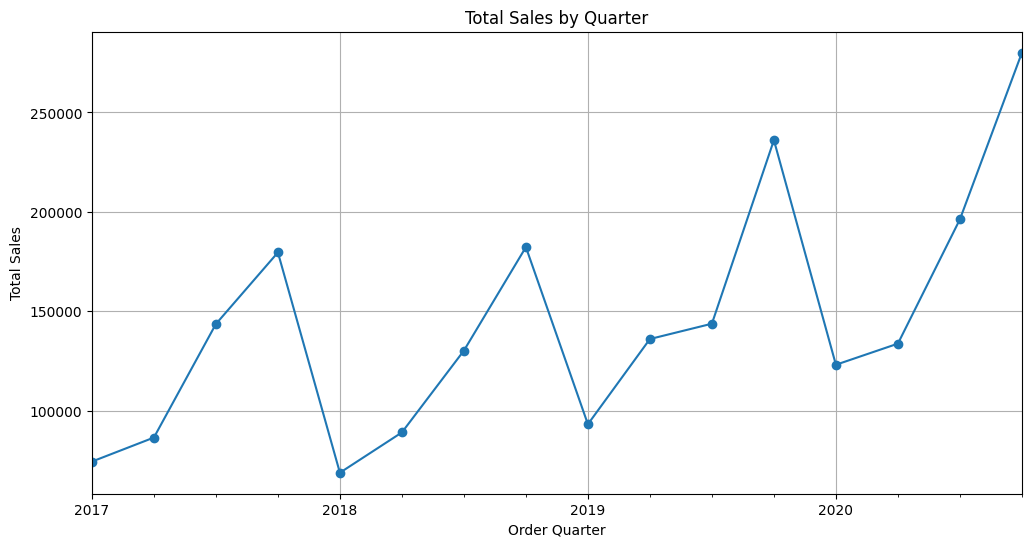

In [22]:
# Create 'Order Quarter' column
store['Order Quarter'] = store['Order Date'].dt.to_period('Q')

# Group data by order quarter and sum sales
quarterly_sales = store.groupby('Order Quarter')['Sales'].sum()

# Plot time series graph
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', marker='o')
plt.title('Total Sales by Quarter')
plt.xlabel('Order Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


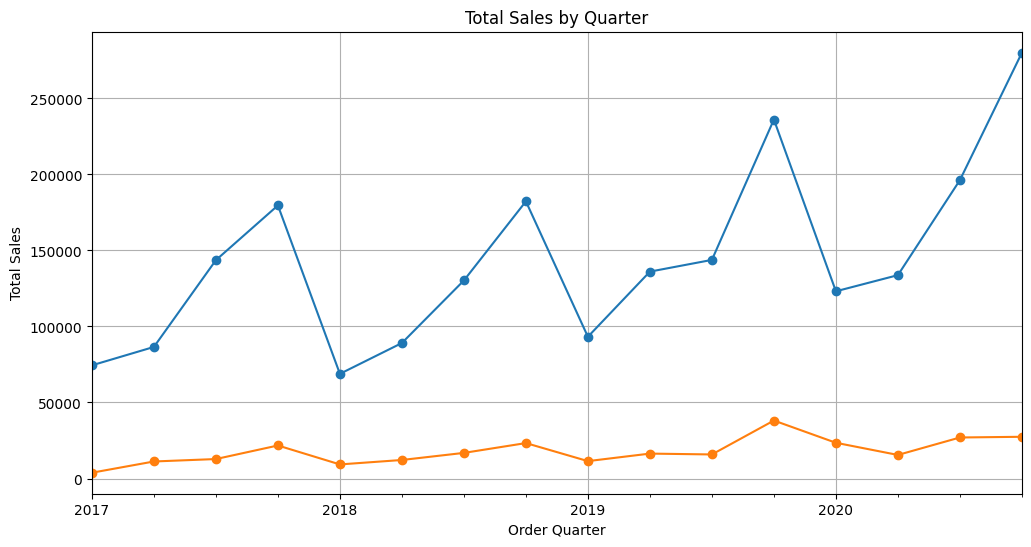

In [23]:
# Create 'Order Quarter' column
store['Order Quarter'] = store['Order Date'].dt.to_period('Q')

# Group data by order quarter and sum sales
quarterly_sales = store.groupby('Order Quarter')['Sales'].sum()
quarterly_profit = store.groupby('Order Quarter')['Profit'].sum()

# Plot time series graph
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', marker='o')
quarterly_profit.plot(kind='line', marker='o')
plt.title('Total Sales by Quarter')
plt.xlabel('Order Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
